In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import mne
%matplotlib inline

dig_data= pd.read_csv('C:/Users/vita7/OneDrive/桌面/Digital_recording.csv',header=None)
phy_data=dig_data * (900/4096)

Text(0.5, 0, 'sample num')

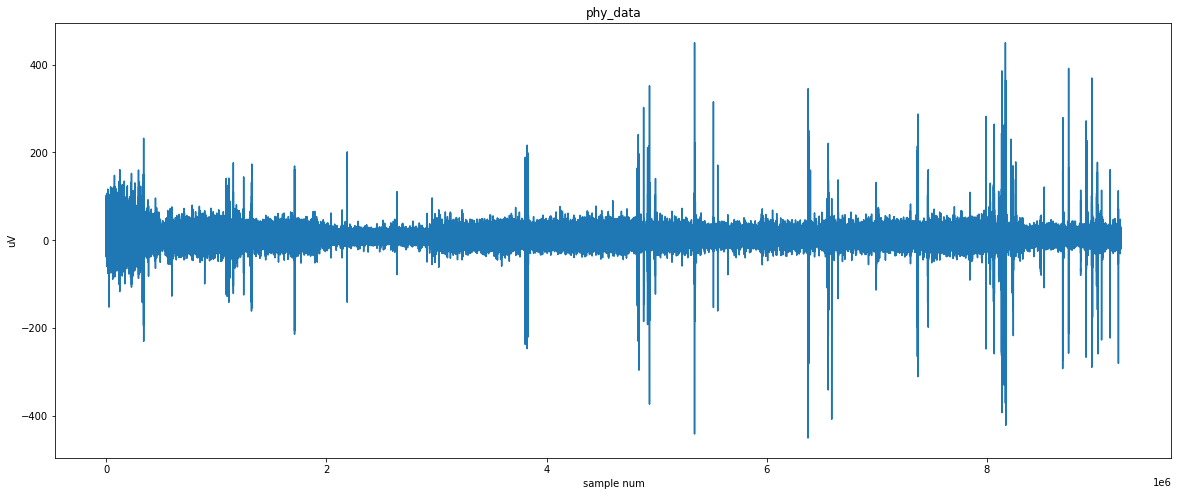

In [2]:
plt.figure(figsize=(20,8))
plt.plot(phy_data[:])
plt.title('phy_data')
plt.ylabel('uV')
plt.xlabel('sample num')

In [3]:
len(phy_data)

9216000

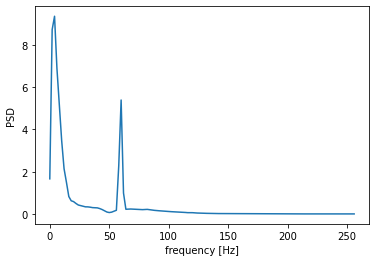

In [4]:
f,pxx = signal.welch(phy_data.values.flatten(),fs=512)
plt.plot(f, pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD ')
plt.show()

In [5]:
filted = mne.filter.filter_data(phy_data.values.flatten(),sfreq=512,l_freq=0.5,h_freq=30)

Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3379 samples (6.600 sec)



Text(0.5, 0, 'sample num')

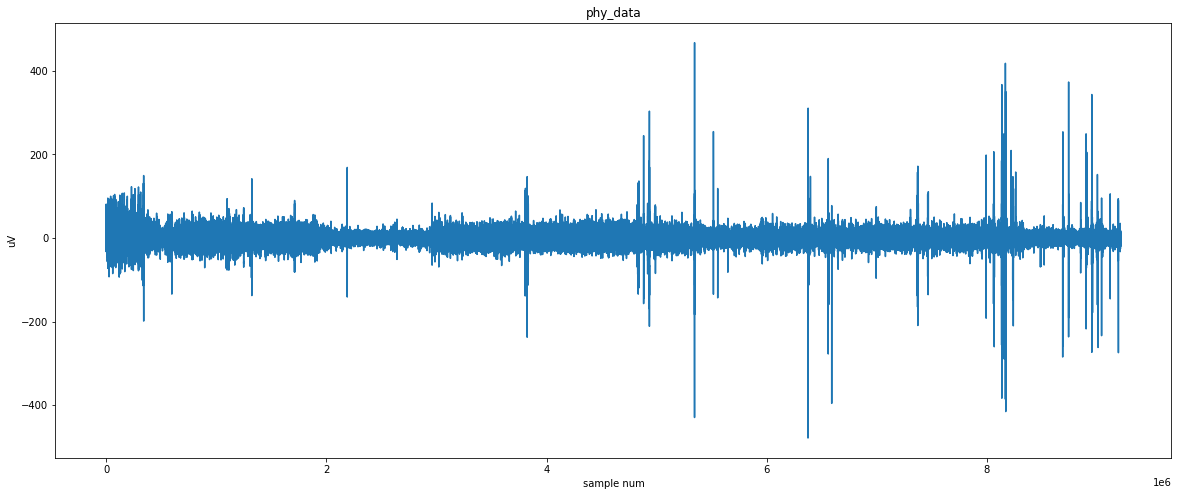

In [6]:
plt.figure(figsize=(20,8))
plt.plot(filted[:])
plt.title('phy_data')
plt.ylabel('uV')
plt.xlabel('sample num')

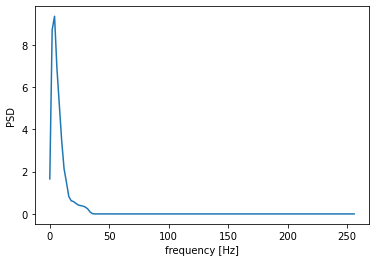

In [7]:
f,pxx = signal.welch(filted,fs=512)
plt.plot(f, pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD ')
plt.show()